In [1]:
import pandas  as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('cleaned_DS_salary.csv', index_col= 0 )
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,max_salary,avg_salary,Company_txt,job_state,is_HQ_state_same,age_of_company,job_simp,seniority,desc_length,num_comp
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973.0,Company - Private,...,91,72.0,Tecolote Research,NM,0,47.0,data scientist,na,2536,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984.0,Other Organization,...,112,87.5,University of Maryland Medical System,MD,0,36.0,data scientist,na,4783,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010.0,Company - Private,...,90,85.0,KnowBe4,FL,1,10.0,data scientist,na,3461,0
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965.0,Government,...,97,76.5,PNNL,WA,1,55.0,data scientist,na,3883,3
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998.0,Company - Private,...,143,114.5,Affinity Solutions,NY,1,22.0,data scientist,na,2728,3


In [3]:
df.describe()

,Rating,Founded,hourly salary,employer_provided,min_salary,max_salary,avg_salary,is_HQ_state_same,age_of_company,desc_length,num_comp
count,731.000000,692.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,692.000000,742.000000,742.000000
mean,3.688372,1969.969653,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,50.030347,3869.545822,1.053908
std,0.570353,54.089762,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,54.089762,1521.495868,1.384239
min,1.900000,1744.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,1.000000,407.000000,0.000000
25%,3.300000,1958.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,13.000000,2801.000000,0.000000
50%,3.700000,1992.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,28.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,62.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,276.000000,10051.000000,4.000000


In [4]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly salary', 'employer_provided', 'min_salary', 'max_salary',
       'avg_salary', 'Company_txt', 'job_state', 'is_HQ_state_same',
       'age_of_company', 'job_simp', 'seniority', 'desc_length', 'num_comp'],
      dtype='object')

<AxesSubplot:>

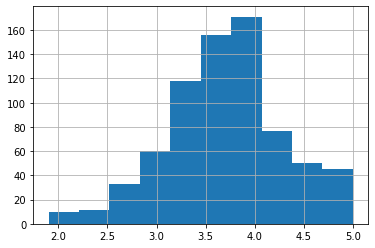

In [5]:
df.Rating.hist()

<AxesSubplot:>

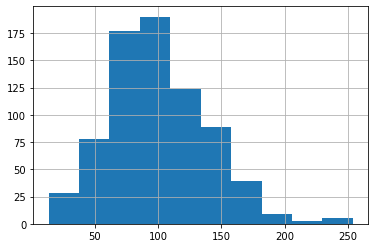

In [6]:
df.avg_salary.hist()

<AxesSubplot:>

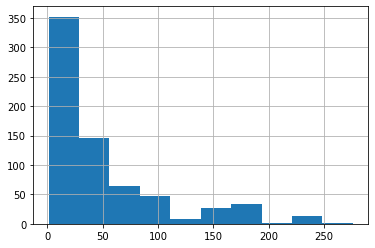

In [7]:
df.age_of_company.hist()

<AxesSubplot:>

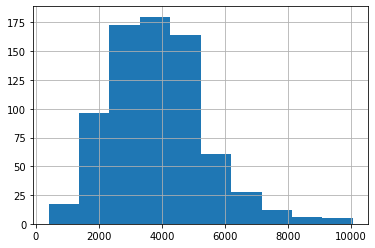

In [8]:
df.desc_length.hist()

<AxesSubplot:>

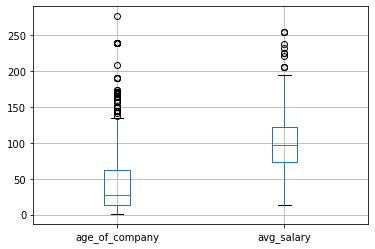

In [9]:
df.boxplot(column= ['age_of_company', 'avg_salary'] )

<AxesSubplot:>

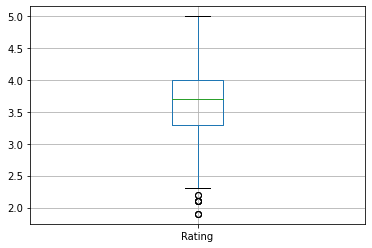

In [10]:
df.boxplot(column= [ 'Rating'] )

In [11]:
df[['age_of_company', 'avg_salary','Rating', 'desc_length']].corr() 

,age_of_company,avg_salary,Rating,desc_length
age_of_company,1.000000,0.023808,-0.108796,0.152058
avg_salary,0.023808,1.000000,0.133678,0.078808
Rating,-0.108796,0.133678,1.000000,-0.081534
desc_length,0.152058,0.078808,-0.081534,1.000000


<AxesSubplot:>

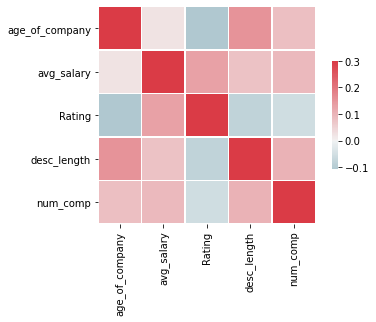

In [12]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(df[['age_of_company', 'avg_salary','Rating', 'desc_length', 'num_comp']].corr(), vmax= 0.3, center= 0, cmap = cmap,
           square = True, linewidths = 0.5, cbar_kws = {"shrink": 0.5})

In [13]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly salary', 'employer_provided', 'min_salary', 'max_salary',
       'avg_salary', 'Company_txt', 'job_state', 'is_HQ_state_same',
       'age_of_company', 'job_simp', 'seniority', 'desc_length', 'num_comp'],
      dtype='object')

In [14]:
df_cat = df[['Location', 'Headquarters', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue','Company_txt', 'job_state','is_HQ_state_same','job_simp', 'seniority']]

Graph for Location : Total = 200


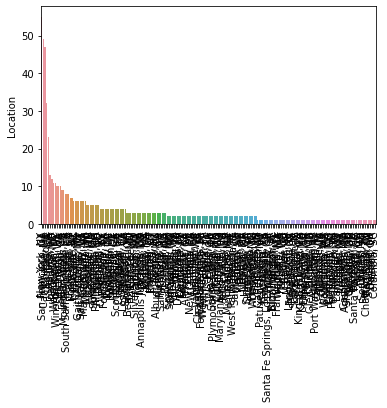

Graph for Headquarters : Total = 197


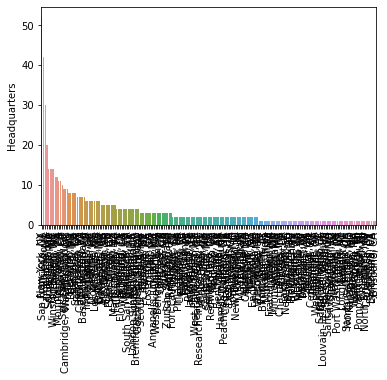

Graph for Size : Total = 8


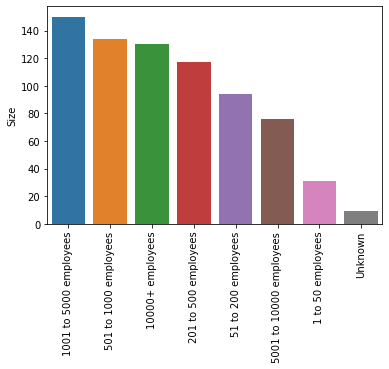

Graph for Type of ownership : Total = 10


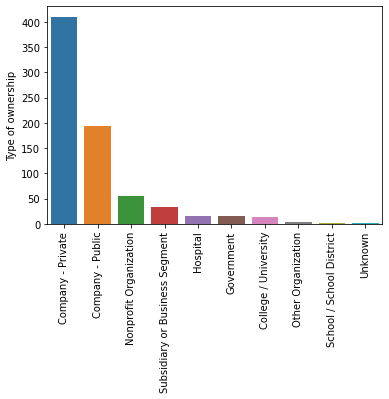

Graph for Industry : Total = 59


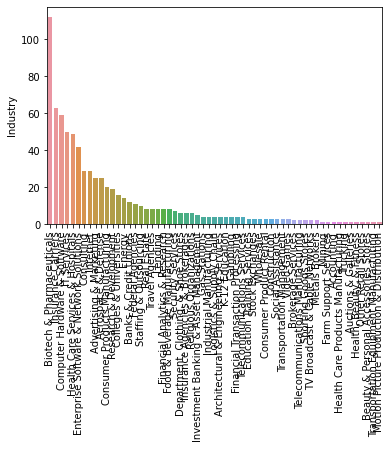

Graph for Sector : Total = 24


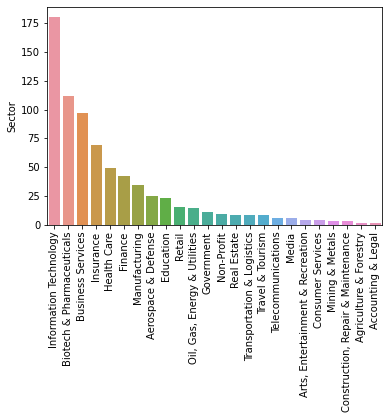

Graph for Revenue : Total = 13


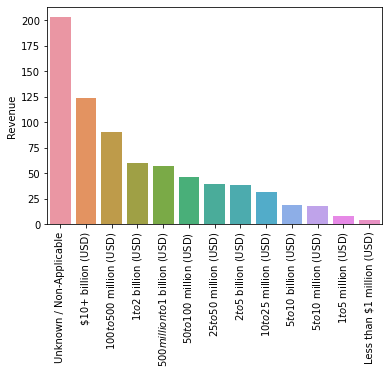

Graph for Company_txt : Total = 341


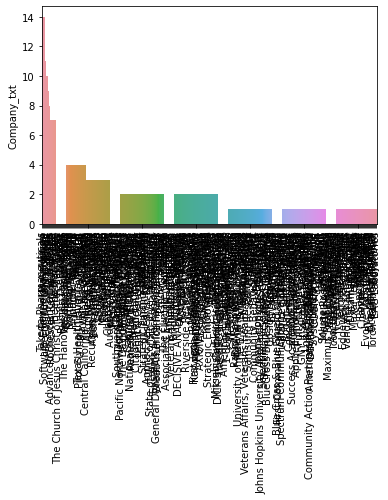

Graph for job_state : Total = 37


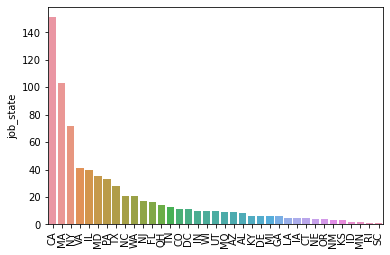

Graph for is_HQ_state_same : Total = 2


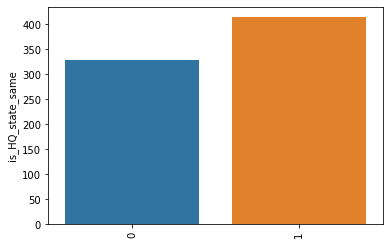

Graph for job_simp : Total = 7


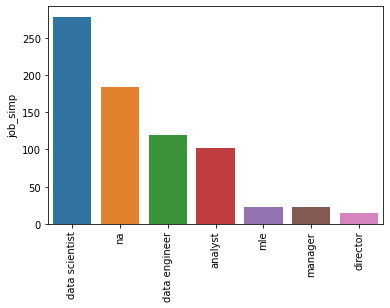

Graph for seniority : Total = 3


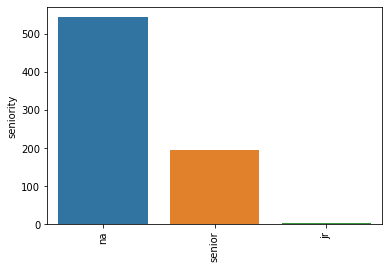

In [15]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("Graph for %s : Total = %d" %(i, len(cat_num)))
    chart = sns.barplot(x = cat_num.index , y = cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
    plt.show()

Graph for Location : Total = 20


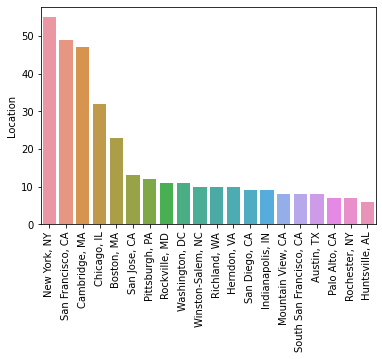

Graph for Headquarters : Total = 20


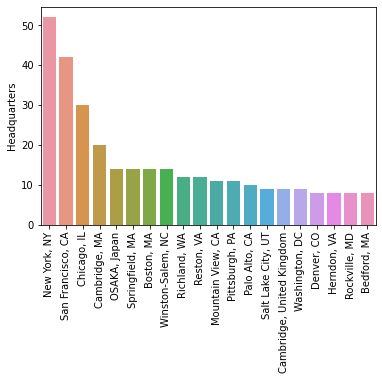

Graph for Company_txt : Total = 20


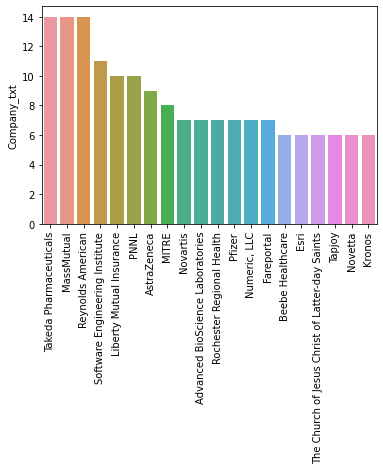

Graph for Industry : Total = 20


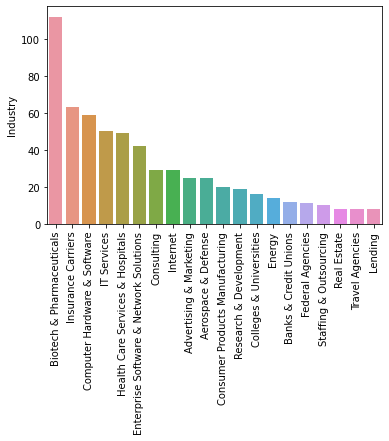

In [16]:
# Above some of the graph are not clear, so we plot only top 20 values of those for visulization  
for i in df_cat[['Location', 'Headquarters','Company_txt','Industry']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("Graph for %s : Total = %d" %(i, len(cat_num)))
    chart = sns.barplot(x = cat_num.index , y = cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
    plt.show()

In [17]:
pd.pivot_table(df, index = 'job_simp', values = 'avg_salary')

,avg_salary
job_simp,
analyst,65.857843
data engineer,105.403361
data scientist,117.564516
director,168.607143
manager,84.022727
mle,126.431818
na,84.853261


In [18]:
pd.pivot_table(df, index = ['job_simp', 'seniority'], values = 'avg_salary')

avg_salary
job_simp       seniority            
analyst        jr          53.250000
               na          61.308219
               senior      79.092593
data engineer  na          97.493976
               senior     123.638889
data scientist jr         106.500000
               na         110.525510
               senior     134.524390
director       na         168.607143
manager        na          84.022727
mle            na         126.218750
               senior     127.000000
na             na          76.885714
               senior     110.204545

In [19]:
pd.pivot_table(df, index = 'job_state', values = 'avg_salary').sort_values('avg_salary', ascending= False)

,avg_salary
job_state,
CA,123.619205
IL,116.662500
DC,110.181818
MA,106.281553
NJ,104.558824
MI,100.250000
RI,100.000000
NY,98.652778
NC,98.452381


In [20]:
pd.pivot_table(df, index = ['job_state', 'job_simp'], values = 'avg_salary').sort_values('avg_salary', ascending= False)

avg_salary
job_state job_simp                  
IL        director        221.750000
CA        mle             177.300000
NJ        director        161.500000
DC        data scientist  149.000000
CA        data scientist  143.044776
...                              ...
CO        na               31.500000
          analyst          29.500000
DE        na               27.500000
LA        na               20.000000
TN        analyst          13.500000

[115 rows x 1 columns]

In [21]:
pd.pivot_table(df, index = ['job_state', 'job_simp'], values = 'avg_salary').sort_values('job_state', ascending= False)

avg_salary
job_state job_simp                  
WI        na               54.000000
          data scientist  113.500000
          analyst          58.833333
WA        na               97.500000
          data scientist   99.764706
...                              ...
AZ        analyst          55.000000
          na              124.500000
AL        na               43.750000
          data engineer    65.000000
          analyst          62.200000

[115 rows x 1 columns]

In [22]:
pd.options.display.max_rows

60

In [23]:
pd.set_option('display.max_rows', None)

In [24]:
 pd.pivot_table(df, index = ['job_state', 'job_simp'], values = 'avg_salary', aggfunc='count').sort_values('job_state', ascending= False)

avg_salary
job_state job_simp                  
WI        na                       4
          data scientist           3
          analyst                  3
WA        na                       1
          data scientist          17
          analyst                  3
VA        na                       5
          mle                      2
          data scientist          18
          data engineer           10
          analyst                  6
UT        data engineer            3
          analyst                  4
          data scientist           3
TX        na                       7
          data scientist          13
          data engineer            8
TN        data scientist           1
          data engineer           10
          analyst                  2
SC        na                       1
RI        analyst                  1
PA        manager                  3
          data engineer            1
          data scientist           6
          analyst                  8
          mle                      7
          na                       8
OR        data scientist           3
          data engineer            1
OH        na                       3
          data scientist           7
          analyst                  4
NY        na                      12
          mle                      2
          data scientist          40
          data engineer            4
          analyst                 14
NM        data scientist           3
NJ        data scientist           4
          analyst                  6
          data engineer            2
          manager                  2
          director                 2
          na                       1
NE        na                       4
NC        na                      12
          data scientist           3
          data engineer            6
MO        na                       3
          manager                  1
          data scientist           3
          analyst                  2
MN        data engineer            1
          analyst                  1
MI        data scientist           4
          manager                  2
MD        na                      16
          data engineer            3
          analyst                  3
          data scientist          13
MA        na                      46
          manager                  5
          director                 6
          data scientist          30
          data engineer           12
          analyst                  4
LA        analyst                  1
          data scientist           1
          data engineer            2
          na                       1
KY        na                       4
          data scientist           2
KS        mle                      3
IN        na                       4
          data scientist           2
          data engineer            4
IL        analyst                  3
          na                       6
          mle                      2
          director                 6
          data scientist          15
          data engineer            8
ID        analyst                  2
IA        analyst                  2
          data engineer            3
GA        data scientist           3
          na                       3
FL        data scientist           7
          data engineer            3
          analyst                  6
DE        na                       6
DC        data scientist           5
          data engineer            4
          analyst                  2
CT        na                       3
          data scientist           2
CO        mle                      1
          data engineer            3
          analyst                  1
          na                       3
          data scientist           3
CA        na                      27
          mle                      5
          manager                  9
          data scientist          67
          data engineer       

In [25]:
 pd.pivot_table(df[df.job_simp == 'data scientist'], index = 'job_state', values = 'avg_salary').sort_values('avg_salary', ascending= False)

,avg_salary
job_state,
DC,149.000000
CA,143.044776
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


In [26]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly salary', 'employer_provided', 'min_salary', 'max_salary',
       'avg_salary', 'Company_txt', 'job_state', 'is_HQ_state_same',
       'age_of_company', 'job_simp', 'seniority', 'desc_length', 'num_comp'],
      dtype='object')

In [27]:
# Rating, Industry, Sector, Revenue, num_comp ,hourly salary, employer_provided, desc_length, Type of ownership  

df_pivots = df[[ 'Rating', 'Industry', 'Sector', 'Revenue', 'num_comp' ,'hourly salary', 'employer_provided', 'desc_length', 'Type of ownership', 'avg_salary']]

In [30]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots, index = i, values = 'avg_salary').sort_values('avg_salary', ascending = False))
    print('\n')

Rating
        avg_salary
Rating            
5.0     134.700000
2.5     120.000000
4.5     117.714286
4.1     116.368421
3.9     113.071429
2.6     109.083333
4.4     108.606061
3.2     105.500000
4.0     105.340426
3.5     104.897959
3.7     104.131148
4.7     103.983871
4.3     102.468750
3.3     101.858974
4.2     100.442308
2.2      97.750000
4.6      97.250000
3.8      96.811475
2.1      95.900000
3.4      93.011364
1.9      87.500000
3.1      86.580000
3.0      85.588235
3.6      85.467391
2.8      83.928571
2.7      83.250000
2.3      81.500000
2.9      81.138889
4.8      80.277778
2.4      60.214286


Industry
                                          avg_salary
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
Telecommunications Services               131.500000
Bro

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [34]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

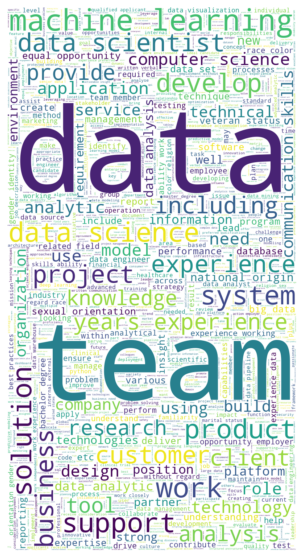

In [36]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()